In [9]:
import pandas as pd

train_data = pd.read_csv("train.txt", sep='\t', header=None, names=["Label", "Content"])
dev_data = pd.read_csv("dev.txt", sep='\t', header=None, names=["Label", "Content"])

In [10]:
train_data[:5]

,Label,Content
0,+,"it 's a tour de force , written and directed s..."
1,-,places a slightly believable love triangle in ...
2,+,"for those of an indulgent , slightly sunbaked ..."
3,-,exactly what you 'd expect from a guy named kaos
4,+,"unfortunately , it appears that jackie chan 's..."


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 1)
train_vectors = vectorizer.fit_transform(train_data['Content'])
test_vectors = vectorizer.transform(dev_data['Content'])

In [32]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

# Perform classification with SVM, kernel=linear
t = time.time()
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, train_data['Label'])
prediction_linear = classifier_linear.predict(test_vectors)

# results
report = classification_report(dev_data['Label'], prediction_linear, output_dict=True)
print("best dev err %.1f%%, time: %.1f secs" % ((1-report['accuracy'])*100, time.time() - t))


best dev err 26.8%, time: 4.8 secs


In [54]:
#creating a function

def svm_train(trainfile, devfile, filter_count = 1):
    t = time.time()
    train_data = pd.read_csv(trainfile, sep='\t', header=None, names=["Label", "Content"])
    dev_data = pd.read_csv(devfile, sep='\t', header=None, names=["Label", "Content"])

    # Create feature vectors
    vectorizer = TfidfVectorizer(min_df = filter_count) # filter n count words
    train_vectors = vectorizer.fit_transform(train_data['Content'])
    test_vectors = vectorizer.transform(dev_data['Content'])

    # Perform classification with SVM, kernel=linear
    classifier_linear = svm.SVC(kernel='linear')
    classifier_linear.fit(train_vectors, train_data['Label'])
    prediction_linear = classifier_linear.predict(test_vectors)

    # results
    report = classification_report(dev_data['Label'], prediction_linear, output_dict=True)
    print("dev err %.1f%%, |w|=%d time: %.1f secs" % ((1-report['accuracy'])*100, train_vectors.shape[1], time.time() - t))


In [55]:
svm_train("train.txt", "dev.txt")

dev err 26.8%, |w|=15747 time: 4.9 secs


In [66]:
svm_train("train.txt", "dev.txt", 2)

dev err 26.5%, |w|=8352 time: 4.6 secs


In [61]:
for n in range(1, 7):
    print("n = ", n-1)
    svm_train("train.txt", "dev.txt", n)

n =  0
dev err 26.8%, |w|=15747 time: 5.0 secs
n =  1
dev err 26.5%, |w|=8352 time: 4.5 secs
n =  2
dev err 26.9%, |w|=5856 time: 4.2 secs
n =  3
dev err 26.5%, |w|=4500 time: 4.1 secs
n =  4
dev err 27.5%, |w|=3621 time: 3.9 secs
n =  5
dev err 26.7%, |w|=3011 time: 3.8 secs


In [44]:
# len(train_vectors)
print(train_vectors.shape[0])

8000


In [50]:
train_vectors.shape[1]

15747

In [58]:
import matplotlib.pyplot as plt

Average Perceptron

Filtering 0 count words

best epoch 12 best dev err 25.9%, |w|=15806, time: 0.7 secs

Filtering 1 count words

best epoch 8 best dev err 26.0%, |w|=8425, time: 0.7 secs

Filtering 2 count words

best epoch 4 best dev err 27.2%, |w|=5934, time: 0.7 secs

Filtering 3 count words

best epoch 9 best dev err 26.1%, |w|=4574, time: 0.7 secs

Filtering 4 count words

best epoch 12 best dev err 27.0%, |w|=3686, time: 0.7 secs

Filtering 5 count words

best epoch 9 best dev err 27.3%, |w|=3078, time: 0.7 secs

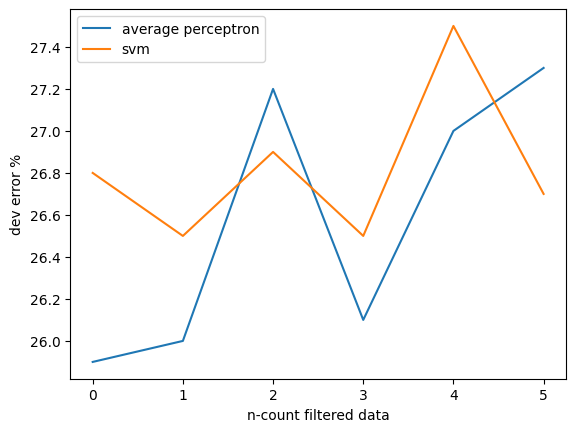

In [67]:
plt.plot([n for n in range(6)], [25.9,26.0,27.2,26.1,27.0,27.3], label = 'average perceptron')
plt.plot([n for n in range(6)], [26.8,26.5,26.9,26.5,27.5,26.7], label='svm')
plt.xlabel('n-count filtered data')
plt.ylabel('dev error %')
plt.legend()
plt.show()